# Filtrar la data para Mantenimiento predictivo (Predictive maintenance) = Time To Event Model


* Filtraremos por discos duros que fallaron en el año dado (tanto por conveniencia como por tamaño del archivo).

* Más adelante usaremos estos datos para crear un modelo de regresión: tiempo de falla.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\rolft\Documents\UAI\UAI_2020\AP_git\me_code\Prueba_2\data\harddrive.csv')
print(df.shape)
df.head()

(3179295, 95)


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe(include='all')

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,3179295,3179295,3179295,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,1.259118e+06,1.259118e+06,3.179295e+06,...,2835.0,2.835000e+03,2835.000000,2.835000e+03,2835.000000,2.835000e+03,7935.000000,7935.0,0.0,0.0
unique,50,65993,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-04-01,JK11A8B9HZTN8R,ST4000DM000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,125904,52,1681473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.849552e-311,6.762506e-05,1.121816e+02,6.856751e+07,1.287652e+02,7.491735e+01,1.052967e+02,...,1.0,1.020068e+08,6.412698,1.948479e+08,19.822222,8.940533e+07,116.131065,0.0,NaN,NaN
std,NaN,NaN,NaN,0.000000e+00,8.223169e-03,1.871325e+01,8.002785e+07,2.488450e+01,4.557482e+01,1.870145e+01,...,0.0,7.223558e+07,22.510855,1.462246e+08,38.854298,6.703960e+07,36.784042,0.0,NaN,NaN
min,NaN,NaN,NaN,3.953828e-313,0.000000e+00,3.300000e+01,0.000000e+00,1.000000e+02,0.000000e+00,7.000000e+01,...,1.0,2.452300e+04,1.000000,6.600000e+01,1.000000,0.000000e+00,100.000000,0.0,NaN,NaN
25%,NaN,NaN,NaN,1.976651e-311,0.000000e+00,1.000000e+02,0.000000e+00,1.310000e+02,0.000000e+00,9.400000e+01,...,1.0,1.462176e+07,1.000000,1.722997e+07,1.000000,7.881220e+06,100.000000,0.0,NaN,NaN
50%,NaN,NaN,NaN,1.976651e-311,0.000000e+00,1.120000e+02,2.984580e+07,1.330000e+02,1.000000e+02,9.800000e+01,...,1.0,1.412617e+08,1.000000,2.741461e+08,1.000000,1.254753e+08,100.000000,0.0,NaN,NaN
75%,NaN,NaN,NaN,1.976651e-311,0.000000e+00,1.170000e+02,1.343214e+08,1.340000e+02,1.040000e+02,1.140000e+02,...,1.0,1.667429e+08,1.000000,3.278856e+08,1.000000,1.500801e+08,100.000000,0.0,NaN,NaN


In [3]:
# drop constant columns
df = df.loc[:, ~df.isnull().all()]
print(df.shape)

(3179295, 91)


In [5]:
# number of hdd
print("number of hdd:", df['serial_number'].value_counts().shape) 

# number of different types of harddrives
print("number of different harddrives", df['model'].value_counts().shape)

number of hdd: (65993,)
number of different harddrives (69,)


# Conservaremos solo los discos duros (HDDs) que fallaron

* Idealmente, usaríamos varios años de datos para más modelos y rango. Hay un gran sesgo aquí cuando no incluimos discos duros que no fallaron.

    * También perdemos la capacidad de identificar discos duros (HDDs) verdaderamente "saludables".

In [5]:
#.loc indexa a traves de la selección tipo array
failed_hdds = df.loc[df.failure==1]["serial_number"]
len(failed_hdds)
failed_hdds.describe()

count          214
unique         205
top       W3006E5B
freq             2
Name: serial_number, dtype: object

Se encontró un item que fallo dos veces coon el mismo ID, se indigará este item para ver si se utilizó su id de nuevo.

In [17]:
#& df.serial_number=='WD-WCC4MKDL77ZK'
caso_rraro=df.loc[df.failure==1 ]#["serial_number"]
caso_rraro=caso_rraro.loc[caso_rraro.serial_number=='WD-WCC4MKDL77ZK']
caso_rraro#.describe()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
30285,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87830,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se aprecia que este Item fallo dos veces el mismo dia, es completamente un dato duplicado, por lo cual se procede a eliminar.

In [26]:
item_A=df.loc[df.serial_number=='WD-WCC4MKDL77ZK']
item_A

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
30285,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87830,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# eliminamos la data que esta repetida
df=df.drop([87830],axis=0)

No posee historia osea que falló en T=1, en el primer instante que aprece en la data

In [6]:
df = df.loc[df["serial_number"].isin(failed_hdds)]
df.shape

(5489, 91)

In [7]:
df.to_csv("data_fail.csv", index = False, sep=',', encoding='utf-8')

# Trabajar con data_fail

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'data\data_fail.csv')
print(df.shape)
df.head()

(5489, 91)


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,100.0,9.784107e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,100.0,2.076417e-314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,100.0,6.394443e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,100.0,6.040397e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,100.0,1.019657e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# number of hdd
print("number of hdd:", df['serial_number'].value_counts().shape) 

# number of different types of harddrives
print("number of different harddrives", df['model'].value_counts().shape)

number of hdd: (205,)
number of different harddrives (25,)


In [4]:
df['failure'] = df['failure'].astype('category')
df.describe(include='all')

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
count,5489,5489,5489,5.489000e+03,5489.0,5489.000000,5.489000e+03,574.000000,574.000000,5489.000000,...,4145.000000,5.489000e+03,517.0,5.170000e+02,517.0,5.170000e+02,517.0,5.170000e+02,569.000000,569.0
unique,50,205,25,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-01,Z302A13D,ST4000DM000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,383,52,3363,NaN,5275.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.491871e-311,NaN,125.217708,9.209842e+07,109.263066,30.547038,103.631809,...,100.772014,9.346153e-313,1.0,9.114263e+07,1.0,1.760305e+08,1.0,8.098668e+07,105.623902,0.0
std,NaN,NaN,NaN,0.000000e+00,NaN,31.330572,8.350810e+07,14.630604,48.272428,19.881404,...,8.753509,0.000000e+00,0.0,6.906034e+07,0.0,1.343972e+08,0.0,6.172386e+07,23.058541,0.0
min,NaN,NaN,NaN,3.953828e-313,NaN,46.000000,0.000000e+00,100.000000,0.000000,88.000000,...,100.000000,0.000000e+00,1.0,4.832275e+06,1.0,9.332548e+06,1.0,4.242648e+06,100.000000,0.0
25%,NaN,NaN,NaN,9.883284e-312,NaN,112.000000,3.875328e+06,100.000000,0.000000,92.000000,...,100.000000,1.090584e-315,1.0,1.560161e+07,1.0,3.050695e+07,1.0,1.403439e+07,100.000000,0.0
50%,NaN,NaN,NaN,1.976651e-311,NaN,117.000000,7.968487e+07,100.000000,0.000000,97.000000,...,100.000000,6.089666e-314,1.0,9.636340e+07,1.0,1.779073e+08,1.0,8.420978e+07,100.000000,0.0
75%,NaN,NaN,NaN,1.976651e-311,NaN,119.000000,1.638509e+08,131.000000,100.000000,100.000000,...,100.000000,6.823167e-313,1.0,1.645459e+08,1.0,3.207806e+08,1.0,1.468970e+08,100.000000,0.0


In [5]:
#Crear una columna con el dia en que muere el articulo
df["end_date"] = df.groupby("serial_number")["date"].transform("max")

In [33]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,end_date,start_date,date_diff,date_diff_date
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-17,2016-01-01,1382400000000000,1382400000000000
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,2016-01-01,8553600000000000,8553600000000000
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-18,2016-01-01,9331200000000000,9331200000000000
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,2016-01-01,8553600000000000,8553600000000000
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-10,2016-01-01,777600000000000,777600000000000


In [35]:
(1382400000000000/60**2)/24/1000000000.0

16.0

In [6]:
df.describe(include='all')

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,end_date
count,5489,5489,5489,5.489000e+03,5489.0,5489.000000,5.489000e+03,574.000000,574.000000,5489.000000,...,5.489000e+03,517.0,5.170000e+02,517.0,5.170000e+02,517.0,5.170000e+02,569.000000,569.0,5489
unique,50,205,25,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
top,2016-01-01,Z302A13D,ST4000DM000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-28
freq,383,52,3363,NaN,5275.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641
mean,NaN,NaN,NaN,1.491871e-311,NaN,125.217708,9.209842e+07,109.263066,30.547038,103.631809,...,9.346153e-313,1.0,9.114263e+07,1.0,1.760305e+08,1.0,8.098668e+07,105.623902,0.0,NaN
std,NaN,NaN,NaN,0.000000e+00,NaN,31.330572,8.350810e+07,14.630604,48.272428,19.881404,...,0.000000e+00,0.0,6.906034e+07,0.0,1.343972e+08,0.0,6.172386e+07,23.058541,0.0,NaN
min,NaN,NaN,NaN,3.953828e-313,NaN,46.000000,0.000000e+00,100.000000,0.000000,88.000000,...,0.000000e+00,1.0,4.832275e+06,1.0,9.332548e+06,1.0,4.242648e+06,100.000000,0.0,NaN
25%,NaN,NaN,NaN,9.883284e-312,NaN,112.000000,3.875328e+06,100.000000,0.000000,92.000000,...,1.090584e-315,1.0,1.560161e+07,1.0,3.050695e+07,1.0,1.403439e+07,100.000000,0.0,NaN
50%,NaN,NaN,NaN,1.976651e-311,NaN,117.000000,7.968487e+07,100.000000,0.000000,97.000000,...,6.089666e-314,1.0,9.636340e+07,1.0,1.779073e+08,1.0,8.420978e+07,100.000000,0.0,NaN
75%,NaN,NaN,NaN,1.976651e-311,NaN,119.000000,1.638509e+08,131.000000,100.000000,100.000000,...,6.823167e-313,1.0,1.645459e+08,1.0,3.207806e+08,1.0,1.468970e+08,100.000000,0.0,NaN


In [7]:
#Crear una columna con el dia en que nace el articulo
df["start_date"] = df.groupby("serial_number")["date"].transform("min")

In [10]:
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])
df["start_date"] = pd.to_datetime(df["start_date"])

In [38]:
df["date_diff_date"] = (df["end_date"] - df["date"])
df["date_diff_date"].describe()

count                       5489
mean     49 days 09:31:22.965931
std      44 days 09:15:58.151740
min              0 days 00:00:00
25%              7 days 00:00:00
50%             21 days 00:00:00
75%             95 days 00:00:00
max            119 days 00:00:00
Name: date_diff_date, dtype: object

In [66]:
#df["date_diff"] = df["end_date"] - df["date"]
#df["date_diff"].describe()
df["date_diff"] = df["end_date"] - df["start_date"]
df["date_diff"].describe()

count                       5489
mean     90 days 13:39:49.287666
std      37 days 13:31:11.132550
min              0 days 00:00:00
25%             94 days 00:00:00
50%            106 days 00:00:00
75%            115 days 00:00:00
max            119 days 00:00:00
Name: date_diff, dtype: object

In [67]:
df['date_diff'] =( df['date_diff'].astype('int64')/60**2)/24/1000000000.0
df['date_diff_date'] = df['date_diff_date'].astype('int64')

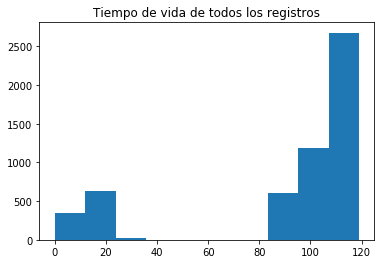

In [107]:
plt.hist(df['date_diff'])#, bins=10
plt.title("Tiempo de vida de todos los registros", fontdict=None, loc='center', pad=None,)
plt.show()

df2=df
df2['T_die']=df["serial_number"].unique()['date_diff']
#len(pd.unique(df["serial_number"]))
#df2['date_diff']=df2['date_diff'].astype('int64')
#df2=df2.to_frame()
df2['T_die']

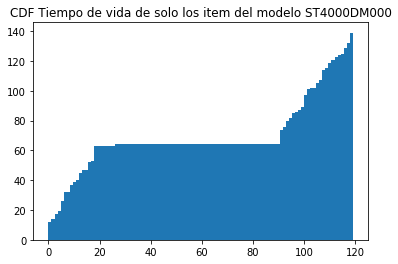

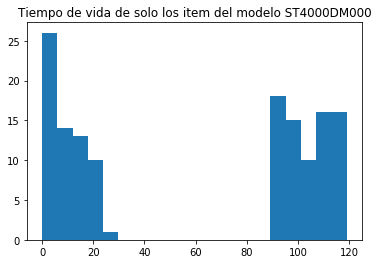

In [122]:
# Imprime la distribución de falla real de los articulos
#failed_hdds = df.loc[df.failure==1]["serial_number"]
df2=df[df.model=='ST4000DM000']
df3 = df2.loc[df2.failure==1]["date_diff"]
plt.hist(df3,cumulative=True ,bins=100)#, bins=10
plt.title("CDF Tiempo de vida de solo los item del modelo ST4000DM000", fontdict=None, loc='center', pad=None,)
plt.show()
plt.hist(df3,bins=20)#, bins=10
plt.title("Tiempo de vida de solo los item del modelo ST4000DM000", fontdict=None, loc='center', pad=None,)
plt.show()

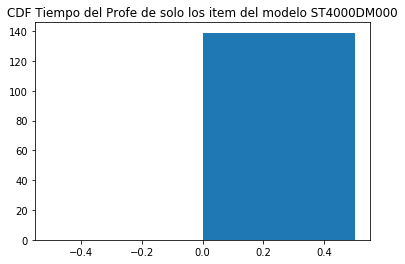

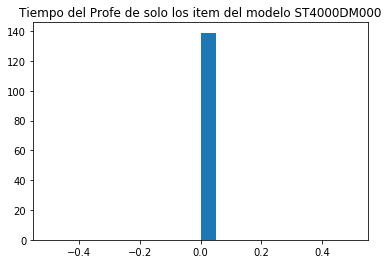

In [120]:
# Imprime la distribución de falla real de los articulos
#failed_hdds = df.loc[df.failure==1]["serial_number"]
df2=df[df.model=='ST4000DM000']
df3 = df2.loc[df2.failure==1]["date_diff_date"]
plt.hist(df3,cumulative=True ,bins=100)#, bins=10
plt.title("CDF Tiempo del Profe de solo los item del modelo ST4000DM000", fontdict=None, loc='center', pad=None,)
plt.show()
plt.hist(df3,bins=20)#, bins=10
plt.title("Tiempo del Profe de solo los item del modelo ST4000DM000", fontdict=None, loc='center', pad=None,)
plt.show()

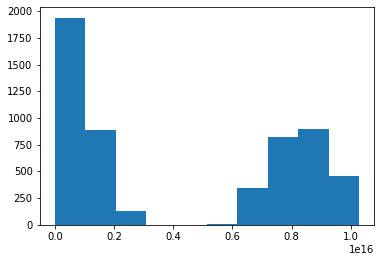

In [26]:
plt.hist(df['date_diff_date'])#, bins=10
plt.show()

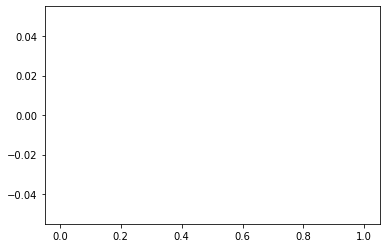

In [28]:
anscombe=df.loc[df.serial_number=='ST4000DM000']
#anscombe.plot(x='X4',y='Y4', kind='scatter')
plt.hist(anscombe['date_diff'])#, bins=10
plt.show()

,capacity_bytes,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,date_diff,date_diff_date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Parece que las fallas tienen una distribución extraña. tal vez estén agrupados alrededor del inicio / final de un año / trimestre.

* NOTE que dejar la fecha en la fecha dará lugar a una fuga en nuestro modelo si no tenemos cuidado (más adelante en el [mismo] año = mayor probabilidad de falla!

# replace string/object with number
df["date_diff"] = df["date_diff"].dt.days
df.drop(["end_date","failure"],axis=1,inplace=True)
print(df.shape)

# replace string/object with number
df["date_diff"] = df["date_diff"].dt.days
df.drop(["end_date","failure"],axis=1,inplace=True)
print(df.shape)

In [ ]:
#df.to_dense().to_csv("submission.csv", index = False, sep=',', encoding='utf-8')